<a href="https://colab.research.google.com/github/aaleksandraristic/GA-s-Stock-Prediction-/blob/main/GAs_Project_ARIMA_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Autoregressive Integrated Moving Average (ARIMA) Model**

# Load required libraries

In [ ]:
!pip install pmdarima

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.tsa.arima.model import ARIMA


# Load the Dataset

In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('/content/final_dataset.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
#stock_data

# Visualize the stocks' daily closing prices

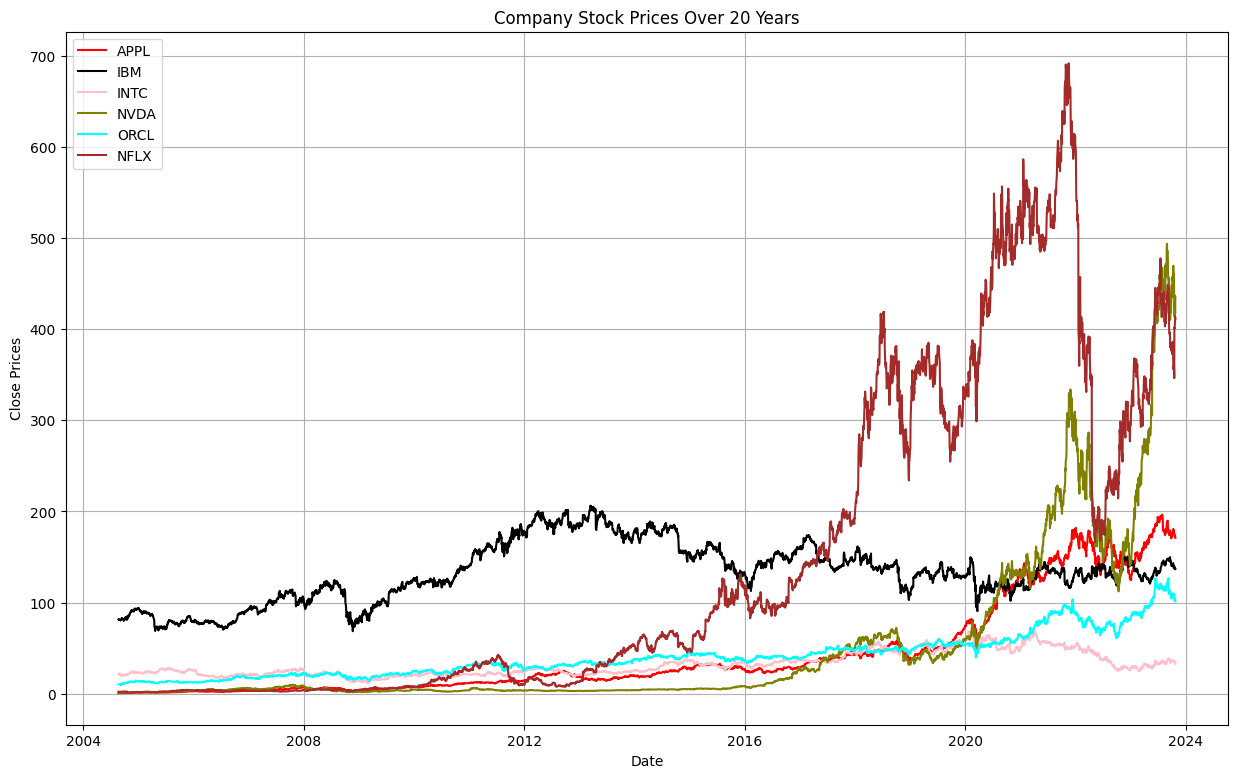

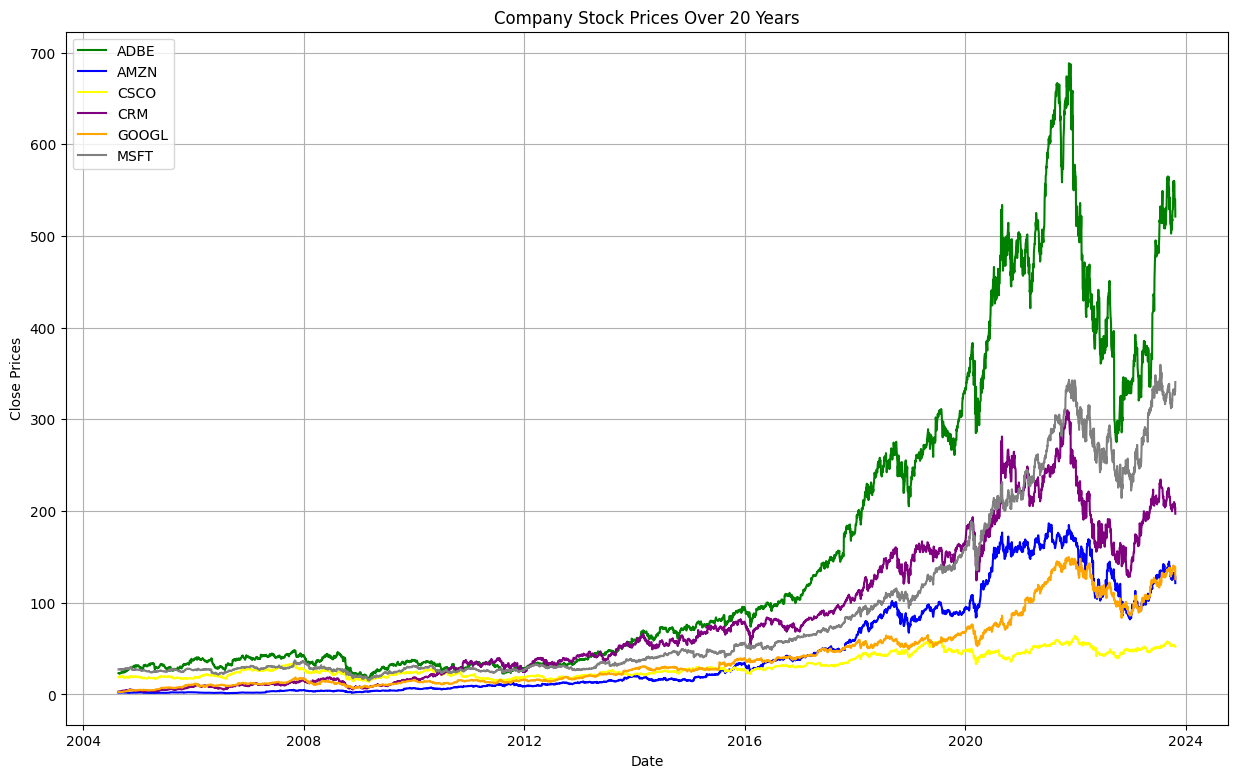

In [ ]:
#plot close price
plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['APPL'], color="red", label="APPL")
plt.plot(stock_data['IBM'], color="black", label="IBM")
plt.plot(stock_data['INTC'], color="pink", label="INTC")
plt.plot(stock_data['NVDA'], color="olive", label="NVDA")
plt.plot(stock_data['ORCL'], color="cyan", label="ORCL")
plt.plot(stock_data['NFLX'], color="brown", label="NFLX")
plt.title('Company Stock Prices Over 20 Years')
plt.legend(loc='upper left')
#plt.show()

#plot close price
plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['ADBE'], color="green", label="ADBE")
plt.plot(stock_data['AMZN'], color="blue", label="AMZN")
plt.plot(stock_data['CSCO'], color="yellow", label="CSCO")
plt.plot(stock_data['CRM'], color="purple", label="CRM")
plt.plot(stock_data['GOOGL'], color="orange", label="GOOGL")
plt.plot(stock_data['MSFT'], color="gray", label="MSFT")
plt.title('Company Stock Prices Over 20 Years')
plt.legend(loc='upper left')
#plt.show()




# Test the stationarity

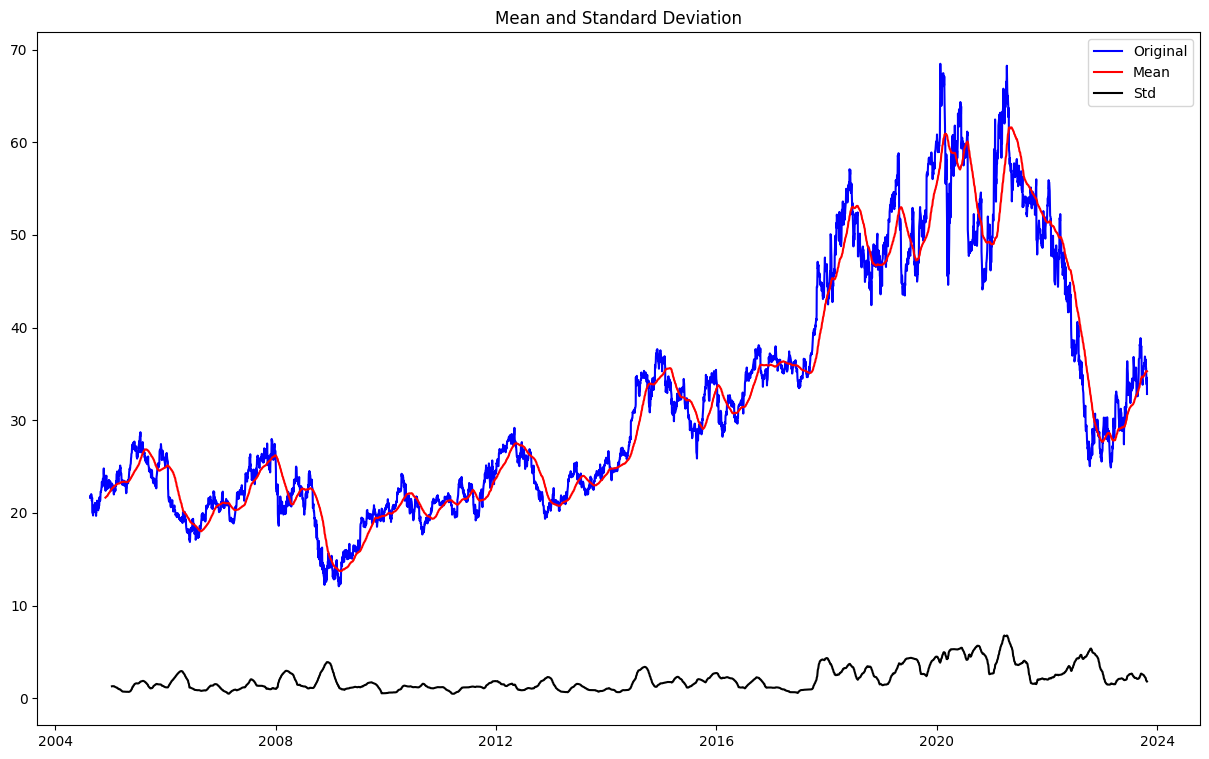

In [ ]:
#Test for staionarity
df_close = stock_data['INTC']
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(70).mean()
    rolstd = timeseries.rolling(100).std()
    #Plot rolling statistics:
    plt.figure(figsize=(15,9))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Mean')
    plt.plot(rolstd, color='black', label = 'Std')
    plt.legend(loc='best')
    plt.title('Mean and Standard Deviation')
    plt.show(block=False)
test_stationarity(df_close)

# Develop an ARIMA model and train it using the stock’s closing price from the train data; dividing data into training and test sets.

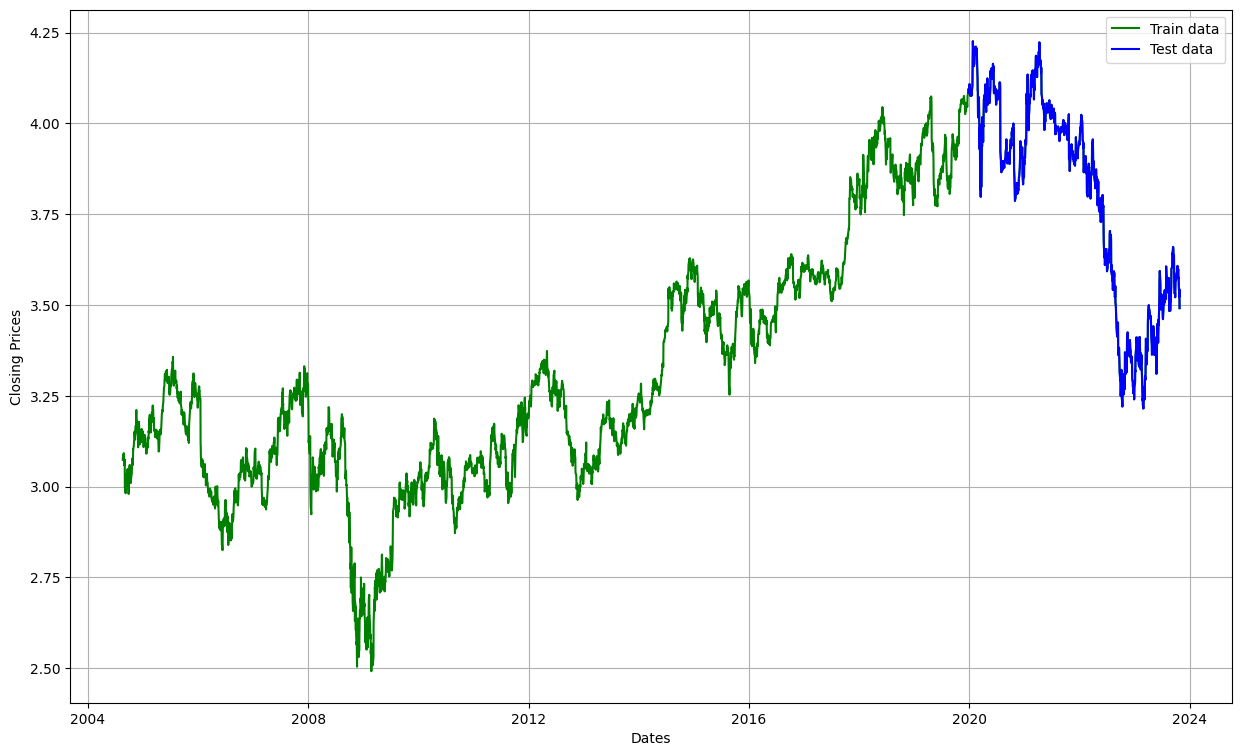

In [ ]:
df_log = np.log(df_close)
#split data into train and test sets
train_data, test_data = df_log[3:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(15,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

# Model autoARIMA - Find the best model

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,  # the auto-regressive (p) and moving average (q)
                      test='adf',       # Augmented Dickey-Fuller test - used to check for stationarity in time series data
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
#model_autoARIMA.plot_diagnostics(figsize=(15,8))
#plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20096.033, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-20109.603, Time=0.93 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-20110.026, Time=6.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-20097.235, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-20107.619, Time=2.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-20108.305, Time=4.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-20110.382, Time=13.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-20135.618, Time=15.90 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-20106.808, Time=7.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-20133.300, Time=12.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-20129.901, Time=10.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-20122.285, Time=3.86 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-20124.858, Time=7.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-20123.062, Time=12.37 sec


# Stocks Prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'test_data' is your time series data
test_data.index = pd.to_datetime(test_data.index)

# Initialize and fit the ARIMA model
arima = ARIMA(test_data, order=(0, 1, 0))  # Adjust the differencing order
model = arima.fit()

# Calculate predictions for the next 5 years (approximately 1825 days)
num_steps = 966
predictions = []

# Start the prediction from the last 100 data points in the testing data
for i in range(num_steps):
    # Forecast one step ahead
    forecast_results = model.get_forecast(steps=1, alpha=0.8)
    next_prediction = forecast_results.predicted_mean.iloc[0]

    # Update the model with the actual data point for the next step
    actual_next_step = test_data.iloc[-num_steps + i]  # Use the actual observed value at the next step
    model = ARIMA(pd.concat([test_data, pd.Series(actual_next_step, index=[test_data.index[-1] + pd.DateOffset(1)])]).diff().dropna(), order=(0, 1, 0)).fit()  # Adjust the differencing order

    # Append the prediction to the list
    predictions.append(next_prediction)

# Create an index for the predictions
prediction_index = pd.date_range(start=test_data.index[-1], periods=num_steps, freq='B')


In [ ]:
import plotly.graph_objects as go

# Create traces for training data, actual stock price, and predicted stock price
trace_train = go.Scatter(x=train_data.index, y=train_data, mode='lines', name='Training Data', line=dict(color='red'))
trace_actual = go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Actual Stock Price', line=dict(color='blue'))
trace_predicted = go.Scatter(x=prediction_index, y=predictions, mode='lines', name='Predicted Stock Price', line=dict(color='green'))

# Create layout
layout = go.Layout(
    title='Stock Price Prediction for the Next 5 Years',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Stock Price'),
    legend=dict(x=1, y=1))

# Create figure
fig = go.Figure(data=[trace_train, trace_actual, trace_predicted], layout=layout)

# Show the figure
fig.show()


In [ ]:
import plotly.graph_objects as go

# Calculate the direction of change in predicted values
predicted_changes = [0] + [1 if predictions[i] > predictions[i-1] else -1 for i in range(1, len(predictions))]

# Create traces for training data, actual stock price, and predicted stock price

trace_train = go.Scatter(x=train_data.index, y=train_data, mode='lines', name='Training Data', line=dict(color='red'))
trace_actual = go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Testing Data', line=dict(color='blue'))

# Create bars for predicted stock price
bars = []

for i, change in enumerate(predicted_changes):
    if change == 1:
        bars.append(go.Bar(x=[prediction_index[i]], y=[predictions[i]], marker=dict(color='green')))
    elif change == -1:
        bars.append(go.Bar(x=[prediction_index[i]], y=[predictions[i]], marker=dict(color='red')))
    else:
        bars.append(go.Bar(x=[prediction_index[i]], y=[predictions[i]], marker=dict(color='blue')))

# Create layout
layout = go.Layout(
    title='Stock Price Prediction for the Next 5 Years',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Stock Price'))

# Create figure
fig = go.Figure(data=[trace_train, trace_actual] + bars, layout=layout)

# Show the figure
fig.show()


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, predictions)

mse

0.1691627819027463